## Data Acquisition and Preprocessing:

In [ ]:
import yfinance as yf
import pandas as pd
import numpy as np
import plotly.graph_objects as go
from plotly.subplots import make_subplots

def load_data(p_ohlc):
    ohlc = p_ohlc
    ohlc["previousClose"] = ohlc["Close"].shift(1)
    ohlc["color"] = np.where(ohlc["Close"] > ohlc["previousClose"], "green", "red")
    ohlc["fill"] = np.where(ohlc["Close"] > ohlc["Open"], "rgba(255, 0, 0, 0)", ohlc["color"])
    ohlc["Percentage"] = ohlc["Volume"] * 100 / ohlc["Volume"].sum()
    price_bins = ohlc.copy()
    price_bins["Close"] = price_bins["Close"].round()
    price_bins = price_bins.groupby("Close", as_index=False)["Volume"].sum()
    price_bins["Percentage"] = price_bins["Volume"] * 100 / price_bins["Volume"].sum()
    return ohlc, price_bins

def hollow_candlesticks(data, p_name):
    fig = make_subplots(
        rows=2,
        cols=2,
        shared_xaxes="columns",
        shared_yaxes="rows",
        column_width=[0.8, 0.2],
        row_heights=[0.8, 0.2],
        horizontal_spacing=0,
        vertical_spacing=0,
        subplot_titles=["Candlestick", "Price Bins", "Volume", ""]
    )
    showlegend = True
    for index, row in data[0].iterrows():
        color = dict(fillcolor=row["fill"], line=dict(color=row["color"]))
        fig.add_trace(
            go.Candlestick(
                x=[index],
                open=[row["Open"]],
                high=[row["High"]],
                low=[row["Low"]],
                close=[row["Close"]],
                increasing=color,
                decreasing=color,
                showlegend=showlegend,
                name=p_name,
                legendgroup="Hollow Candlesticks"
            ),
            row=1,
            col=1
        )
        showlegend = False
    fig.add_trace(
        go.Bar(
            x=data[0].index,
            y=data[0]["Volume"],
            text=data[0]["Percentage"],
            marker_line_color=data[0]["color"],
            marker_color=data[0]["fill"],
            name="Volume",
            texttemplate="%{text:.2f}%",
            hoverinfo="x+y",
            textfont=dict(color="white")
        ),
        col=1,
        row=2,
    )
    fig.add_trace(
        go.Bar(
            y=data[1]["Close"],
            x=data[1]["Volume"],
            text=data[1]["Percentage"],
            name="Price Bins",
            orientation="h",
            marker_color="yellow",
            texttemplate="%{text:.2f}% @ %{y}",
            hoverinfo="x+y"
        ),
        col=2,
        row=1,
    )

    fig.update_xaxes(
        rangebreaks=[dict(bounds=["sat", "mon"])],
        rangeslider_visible=False,
        col=1
    )
    fig.update_xaxes(
        showticklabels=True,
        showspikes=True,
        showgrid=True,
        col=2,
        row=1
    )
    fig.update_layout(
        template="plotly_dark",
        hovermode="x unified",
        title_text=f"Hollow Candlesticks for {p_name}"
    )
    fig.show()

# Symbols list
symbols = ['AEFES.IS', 'AGHOL.IS', 'AKBNK.IS', 'AKFGY.IS', 'AKSA.IS', 'AKSEN.IS',
           'ALARK.IS', 'ALBRK.IS', 'ALGYO.IS', 'ALKIM.IS', 'ARCLK.IS', 'BAGFS.IS',
           'BERA.IS', 'BIMAS.IS', 'BRYAT.IS', 'BUCIM.IS', 'CCOLA.IS', 'CEMTS.IS',
           'CIMSA.IS', 'DEVA.IS', 'DOAS.IS', 'DOHOL.IS', 'ECILC.IS', 'EGEEN.IS',
           'EKGYO.IS', 'ENJSA.IS', 'ENKAI.IS', 'ERBOS.IS', 'EREGL.IS', 'FROTO.IS',
           'GARAN.IS',  'GESAN.IS', 'GLYHO.IS', 'GOZDE.IS', 'GSDHO.IS', 'GUBRF.IS',
           'GWIND.IS', 'HALKB.IS', 'ISCTR.IS', 'ISDMR.IS', 'ISFIN.IS', 'ISGYO.IS',
           'ISMEN.IS', 'JANTS.IS', 'KARSN.IS', 'KARTN.IS', 'KCHOL.IS', 'KONTR.IS',
           'KORDS.IS', 'KOZAA.IS', 'KOZAL.IS', 'KRDMD.IS', 'LOGO.IS', 'MAVI.IS',
           'MGROS.IS', 'NTHOL.IS', 'NUGYO.IS', 'ODAS.IS', 'OTKAR.IS', 'OYAKC.IS',
           'PETKM.IS', 'PGSUS.IS', 'PRKAB.IS',  'QUAGR.IS', 'SAHOL.IS', 'SASA.IS',
           'SKBNK.IS', 'SMRTG.IS', 'SNGYO.IS', 'SOKM.IS', 'TAVHL.IS', 'TCELL.IS',
           'THYAO.IS', 'TKFEN.IS', 'TMSN.IS', 'TOASO.IS', 'TRGYO.IS', 'TSKB.IS',
           'TSPOR.IS', 'TTKOM.IS', 'TTRAK.IS', 'TUKAS.IS', 'TUPRS.IS', 'TURSG.IS',
           'ULKER.IS', 'VAKBN.IS', 'VESBE.IS', 'VESTL.IS', 'YATAS.IS', 'YKBNK.IS', 'YYLGD.IS']

# Pull the data for each symbol and call the hollow_candlesticks function
for symbol in symbols:
     # Download data with a potentially longer period (adjust as needed)
    data = yf.download(symbol, start="2023-10-01", end="2023-10-31", interval="1h")
    ohlc, price_bins = load_data(data)

    # Cleaning process: Drop NaN values
    ohlc = ohlc.dropna()
    price_bins = price_bins.dropna()

    hollow_candlesticks((ohlc, price_bins), symbol)


## Feature Engineering:

In [ ]:
!pip install catboost

url = 'https://anaconda.org/conda-forge/libta-lib/0.4.0/download/linux-64/libta-lib-0.4.0-h166bdaf_1.tar.bz2'
!curl -L $url | tar xj -C /usr/lib/x86_64-linux-gnu/ lib --strip-components=1
url = 'https://anaconda.org/conda-forge/ta-lib/0.4.19/download/linux-64/ta-lib-0.4.19-py310hde88566_4.tar.bz2'
!curl -L $url | tar xj -C /usr/local/lib/python3.10/dist-packages/ lib/python3.10/site-packages/talib --strip-components=3
import talib

In [74]:

from sklearn.impute import SimpleImputer
import talib

# Function to extract features using talib
def extract_features(data):
    features = pd.DataFrame()

    # Basic candlestick features
    features['wick_length'] = data['High'] - data[['Open', 'Close']].max(axis=1)
    features['shadow_ratio'] = features['wick_length'] / (data['Close'] - data['Open'])

    # Technical indicators using talib
    features['EMA_5'] = talib.EMA(data['Close'], timeperiod=5)
    features['EMA_13'] = talib.EMA(data['Close'], timeperiod=13)
    features['EMA_50'] = talib.EMA(data['Close'], timeperiod=50)

    features['SMA_5'] = talib.EMA(data['Close'], timeperiod=5)
    features['SMA_13'] = talib.EMA(data['Close'], timeperiod=13)
    features['SMA_50'] = talib.EMA(data['Close'], timeperiod=50)

    features['MFI'] = talib.MFI(data['High'], data['Low'], data['Close'], data['Volume'], timeperiod=14)
    features['MACD'], _, _ = talib.MACD(data['Close'], fastperiod=12, slowperiod=26, signalperiod=9)
    features['Volume'] = data['Volume']
    features['RSI'] = talib.RSI(data['Close'], timeperiod=14)

    # Target variable - Binary classification based on mean value
    close_mean = data['Close'].mean()
    features['NextCandlestickPattern'] = np.where(data['Close'].fillna(close_mean) > close_mean, 1, 0)


    return features



# Create an empty DataFrame to store features
features_df = pd.DataFrame()

# Loop through symbols and extract features
for symbol in symbols:


    # Check if there is any data before applying the imputer
    if not data.empty:
        # Handle missing values using SimpleImputer
        data['Close'] = SimpleImputer(strategy='median').fit_transform(data[['Close']])

        extracted_features = extract_features(data)
        extracted_features['Symbol'] = symbol
        features_df = features_df.append(extracted_features, ignore_index=True)




<ipython-input-74-8dfdf35155f2>:49: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

<ipython-input-74-8dfdf35155f2>:49: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

<ipython-input-74-8dfdf35155f2>:49: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

<ipython-input-74-8dfdf35155f2>:49: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

<ipython-input-74-8dfdf35155f2>:49: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

<ipython-input-74-8dfdf35155f2>:49: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Us

## Machine Learning Models:

In [ ]:
!pip install optuna
!pip install git+https://github.com/optuna/optuna.git
!conda install -c conda-forge optuna

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


<ipython-input-76-f01c740bf7f1>:70: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

<ipython-input-76-f01c740bf7f1>:70: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

<ipython-input-76-f01c740bf7f1>:70: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

<ipython-input-76-f01c740bf7f1>:70: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


<ipython-input-76-f01c740bf7f1>:70: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

<ipython-input-76-f01c740bf7f1>:70: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

<ipython-input-76-f01c740bf7f1>:70: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


<ipython-input-76-f01c740bf7f1>:70: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

<ipython-input-76-f01c740bf7f1>:70: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

<ipython-input-76-f01c740bf7f1>:70: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

<ipython-input-76-f01c740bf7f1>:70: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed

<ipython-input-76-f01c740bf7f1>:70: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.




[*********************100%%**********************]  1 of 1 completed

<ipython-input-76-f01c740bf7f1>:70: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.




[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed

<ipython-input-76-f01c740bf7f1>:70: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

<ipython-input-76-f01c740bf7f1>:70: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

<ipython-input-76-f01c740bf7f1>:70: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.




[*********************100%%**********************]  1 of 1 completed


<ipython-input-76-f01c740bf7f1>:70: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


<ipython-input-76-f01c740bf7f1>:70: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

<ipython-input-76-f01c740bf7f1>:70: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


<ipython-input-76-f01c740bf7f1>:70: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

<ipython-input-76-f01c740bf7f1>:70: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



[*********************100%%**********************]  1 of 1 completed

<ipython-input-76-f01c740bf7f1>:70: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.




[*********************100%%**********************]  1 of 1 completed


<ipython-input-76-f01c740bf7f1>:70: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


<ipython-input-76-f01c740bf7f1>:70: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

<ipython-input-76-f01c740bf7f1>:70: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


<ipython-input-76-f01c740bf7f1>:70: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

<ipython-input-76-f01c740bf7f1>:70: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



[*********************100%%**********************]  1 of 1 completed


<ipython-input-76-f01c740bf7f1>:70: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



[*********************100%%**********************]  1 of 1 completed


<ipython-input-76-f01c740bf7f1>:70: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


<ipython-input-76-f01c740bf7f1>:70: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

<ipython-input-76-f01c740bf7f1>:70: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



[*********************100%%**********************]  1 of 1 completed


<ipython-input-76-f01c740bf7f1>:70: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



[*********************100%%**********************]  1 of 1 completed


<ipython-input-76-f01c740bf7f1>:70: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



[*********************100%%**********************]  1 of 1 completed


<ipython-input-76-f01c740bf7f1>:70: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed

<ipython-input-76-f01c740bf7f1>:70: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.




[*********************100%%**********************]  1 of 1 completed


<ipython-input-76-f01c740bf7f1>:70: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

<ipython-input-76-f01c740bf7f1>:70: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


<ipython-input-76-f01c740bf7f1>:70: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

<ipython-input-76-f01c740bf7f1>:70: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


<ipython-input-76-f01c740bf7f1>:70: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



[*********************100%%**********************]  1 of 1 completed


<ipython-input-76-f01c740bf7f1>:70: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

<ipython-input-76-f01c740bf7f1>:70: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


<ipython-input-76-f01c740bf7f1>:70: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

<ipython-input-76-f01c740bf7f1>:70: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


<ipython-input-76-f01c740bf7f1>:70: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

<ipython-input-76-f01c740bf7f1>:70: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


<ipython-input-76-f01c740bf7f1>:70: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

<ipython-input-76-f01c740bf7f1>:70: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


<ipython-input-76-f01c740bf7f1>:70: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

<ipython-input-76-f01c740bf7f1>:70: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed

<ipython-input-76-f01c740bf7f1>:70: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

<ipython-input-76-f01c740bf7f1>:70: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



<ipython-input-76-f01c740bf7f1>:70: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


<ipython-input-76-f01c740bf7f1>:70: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

<ipython-input-76-f01c740bf7f1>:70: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed

<ipython-input-76-f01c740bf7f1>:70: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.




[*********************100%%**********************]  1 of 1 completed


<ipython-input-76-f01c740bf7f1>:70: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

<ipython-input-76-f01c740bf7f1>:70: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


<ipython-input-76-f01c740bf7f1>:70: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

<ipython-input-76-f01c740bf7f1>:70: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


<ipython-input-76-f01c740bf7f1>:70: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

<ipython-input-76-f01c740bf7f1>:70: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed

<ipython-input-76-f01c740bf7f1>:70: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

<ipython-input-76-f01c740bf7f1>:70: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.




[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed

<ipython-input-76-f01c740bf7f1>:70: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

<ipython-input-76-f01c740bf7f1>:70: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.




[*********************100%%**********************]  1 of 1 completed


<ipython-input-76-f01c740bf7f1>:70: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

<ipython-input-76-f01c740bf7f1>:70: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


<ipython-input-76-f01c740bf7f1>:70: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

<ipython-input-76-f01c740bf7f1>:70: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


<ipython-input-76-f01c740bf7f1>:70: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

<ipython-input-76-f01c740bf7f1>:70: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


<ipython-input-76-f01c740bf7f1>:70: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

<ipython-input-76-f01c740bf7f1>:70: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


<ipython-input-76-f01c740bf7f1>:70: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

<ipython-input-76-f01c740bf7f1>:70: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed

<ipython-input-76-f01c740bf7f1>:70: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

<ipython-input-76-f01c740bf7f1>:70: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.




[*********************100%%**********************]  1 of 1 completed


<ipython-input-76-f01c740bf7f1>:70: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

<ipython-input-76-f01c740bf7f1>:70: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


<ipython-input-76-f01c740bf7f1>:70: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

<ipython-input-76-f01c740bf7f1>:70: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


<ipython-input-76-f01c740bf7f1>:70: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

<ipython-input-76-f01c740bf7f1>:70: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


<ipython-input-76-f01c740bf7f1>:70: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

<ipython-input-76-f01c740bf7f1>:70: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


<ipython-input-76-f01c740bf7f1>:70: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

<ipython-input-76-f01c740bf7f1>:70: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


<ipython-input-76-f01c740bf7f1>:70: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

<ipython-input-76-f01c740bf7f1>:70: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



[*********************100%%**********************]  1 of 1 completed

<ipython-input-76-f01c740bf7f1>:70: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

[I 2023-12-24 13:58:55,054] A new study created in memory with name: no-name-a628bcee-d5ab-4aa2-b7e4-1a830c723a90


[I 2023-12-24 13:58:55,861] Trial 0 finished with value: 0.0 and parameters: {'n_estimators': 131, 'max_depth': 30, 'min_samples_split': 0.4250025823585637, 'min_samples_leaf': 0.13403941381819662}. Best is trial 0 with value: 0.0.
[I 2023-12-24 13:58:56,469] Trial 1 finished with value: 0.0 and parameters: {'n_estimators': 107, 'max_depth': 26, 'min_samples_split': 0.2796201077845303, 'min_samples_leaf': 0.26092609461551264}. Best is trial 0 with value: 0.0.
[I 2023-12-24 13:58:57,162] Trial 2 finished with value: 0.0 and parameters: {'n_estimators': 235, 'max_depth': 19, 'min_samples_split': 0.7232370738103888, 'min_samples_leaf': 0.4001756379694913}. Best is trial 0 with value: 0.0.
[I 2023-12-24 13:58:59,491] Trial 3 finished with value: 0.0 and parameters: {'n_estimators': 419, 'max_depth': 26, 'min_samples_split': 0.495866415240223, 'min_samples_leaf': 0.18642241342038385}. Best is trial 0 with value: 0.0.
[I 2023-12-24 13:59:00,064] Trial 4 finished with value: 0.0 and parameter

[LightGBM] [Warning] feature_fraction is set=0.8810557608826248, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8810557608826248
[LightGBM] [Warning] feature_fraction is set=0.8810557608826248, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8810557608826248
[LightGBM] [Info] Number of positive: 2837, number of negative: 8564
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001758 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3060
[LightGBM] [Info] Number of data points in the train set: 11401, number of used features: 12
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.248838 -> initscore=-1.104820
[LightGBM] [Info] Start training from score -1.104820


[I 2023-12-24 14:01:47,666] A new study created in memory with name: no-name-c8b9f30f-7a2a-4988-83b2-36a37bfe2a4f
[I 2023-12-24 14:01:48,911] Trial 0 finished with value: 0.09230769230769231 and parameters: {'iterations': 453, 'learning_rate': 0.06407678858272994, 'depth': 5}. Best is trial 0 with value: 0.09230769230769231.
[I 2023-12-24 14:01:50,337] Trial 1 finished with value: 0.0 and parameters: {'iterations': 278, 'learning_rate': 0.01560145713518813, 'depth': 4}. Best is trial 0 with value: 0.09230769230769231.
[I 2023-12-24 14:01:51,614] Trial 2 finished with value: 0.08667529107373868 and parameters: {'iterations': 788, 'learning_rate': 0.05991978865520134, 'depth': 3}. Best is trial 0 with value: 0.09230769230769231.
[I 2023-12-24 14:01:52,231] Trial 3 finished with value: 0.036960985626283374 and parameters: {'iterations': 103, 'learning_rate': 0.0772500202952413, 'depth': 6}. Best is trial 0 with value: 0.09230769230769231.
[I 2023-12-24 14:01:52,624] Trial 4 finished with 

0:	learn: 0.6537461	total: 45.3ms	remaining: 34.8s
1:	learn: 0.6230218	total: 94.7ms	remaining: 36.3s
2:	learn: 0.5984579	total: 139ms	remaining: 35.5s
3:	learn: 0.5785333	total: 186ms	remaining: 35.6s
4:	learn: 0.5628816	total: 245ms	remaining: 37.5s
5:	learn: 0.5512543	total: 309ms	remaining: 39.3s
6:	learn: 0.5402119	total: 375ms	remaining: 40.8s
7:	learn: 0.5316446	total: 442ms	remaining: 42s
8:	learn: 0.5253385	total: 497ms	remaining: 42s
9:	learn: 0.5187397	total: 544ms	remaining: 41.3s
10:	learn: 0.5135938	total: 589ms	remaining: 40.6s
11:	learn: 0.5084591	total: 634ms	remaining: 40s
12:	learn: 0.5032035	total: 680ms	remaining: 39.5s
13:	learn: 0.5003154	total: 730ms	remaining: 39.4s
14:	learn: 0.4971883	total: 782ms	remaining: 39.3s
15:	learn: 0.4941569	total: 842ms	remaining: 39.6s
16:	learn: 0.4916866	total: 890ms	remaining: 39.4s
17:	learn: 0.4888609	total: 940ms	remaining: 39.2s
18:	learn: 0.4864788	total: 990ms	remaining: 39.1s
19:	learn: 0.4834837	total: 1.04s	remaining: 

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control t

RandomForest Classification Report:
              precision    recall  f1-score   support

           0       0.75      1.00      0.86      4206
           1       0.00      0.00      0.00      1410

    accuracy                           0.75      5616
   macro avg       0.37      0.50      0.43      5616
weighted avg       0.56      0.75      0.64      5616

RandomForest Precision: 0.0
RandomForest Recall: 0.0
RandomForest F1 Score: 0.0
RandomForest Next Candle Prediction: 0

[LightGBM] [Warning] feature_fraction is set=0.8810557608826248, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8810557608826248
LGBM Classification Report:
              precision    recall  f1-score   support

           0       0.77      0.90      0.83      4206
           1       0.42      0.20      0.28      1410

    accuracy                           0.73      5616
   macro avg       0.60      0.55      0.55      5616
weighted avg       0.68      0.73      0.69      5616

LGBM Pre

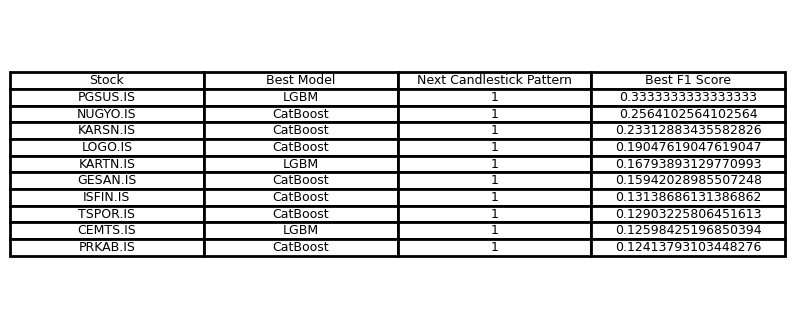

In [76]:
import optuna
from sklearn.ensemble import RandomForestClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
from sklearn.metrics import f1_score, classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline



def evaluate_models(X_test, y_test, pipelines):
    results = []
    for model_name, pipeline in pipelines.items():
        y_pred = pipeline.predict(X_test)
        precision = precision_score(y_test, y_pred)
        recall = recall_score(y_test, y_pred)
        f1 = f1_score(y_test, y_pred)

        print(f"{model_name} Classification Report:")
        print(classification_report(y_test, y_pred))
        print(f"{model_name} Precision: {precision}")
        print(f"{model_name} Recall: {recall}")
        print(f"{model_name} F1 Score: {f1}")
        print(f"{model_name} Next Candle Prediction: {y_pred[-1]}\n")

        # Save metrics for each model
        results.append({
            'Model': model_name,
            'Precision': precision,
            'Recall': recall,
            'F1 Score': f1
        })

    return results

# Download and preprocess data
symbols = ['AEFES.IS', 'AGHOL.IS', 'AKBNK.IS', 'AKFGY.IS', 'AKSA.IS', 'AKSEN.IS',
           'ALARK.IS', 'ALBRK.IS', 'ALGYO.IS', 'ALKIM.IS', 'ARCLK.IS', 'BAGFS.IS',
           'BERA.IS', 'BIMAS.IS', 'BRYAT.IS', 'BUCIM.IS', 'CCOLA.IS', 'CEMTS.IS',
           'CIMSA.IS', 'DEVA.IS', 'DOAS.IS', 'DOHOL.IS', 'ECILC.IS', 'EGEEN.IS',
           'EKGYO.IS', 'ENJSA.IS', 'ENKAI.IS', 'ERBOS.IS', 'EREGL.IS', 'FROTO.IS',
           'GARAN.IS',  'GESAN.IS', 'GLYHO.IS', 'GOZDE.IS', 'GSDHO.IS', 'GUBRF.IS',
           'GWIND.IS', 'HALKB.IS', 'ISCTR.IS', 'ISDMR.IS', 'ISFIN.IS', 'ISGYO.IS',
           'ISMEN.IS', 'JANTS.IS', 'KARSN.IS', 'KARTN.IS', 'KCHOL.IS', 'KONTR.IS',
           'KORDS.IS', 'KOZAA.IS', 'KOZAL.IS', 'KRDMD.IS', 'LOGO.IS', 'MAVI.IS',
           'MGROS.IS', 'NTHOL.IS', 'NUGYO.IS', 'ODAS.IS', 'OTKAR.IS', 'OYAKC.IS',
           'PETKM.IS', 'PGSUS.IS', 'PRKAB.IS',  'QUAGR.IS', 'SAHOL.IS', 'SASA.IS',
           'SKBNK.IS', 'SMRTG.IS', 'SNGYO.IS', 'SOKM.IS', 'TAVHL.IS', 'TCELL.IS',
           'THYAO.IS', 'TKFEN.IS', 'TMSN.IS', 'TOASO.IS', 'TRGYO.IS', 'TSKB.IS',
           'TSPOR.IS', 'TTKOM.IS', 'TTRAK.IS', 'TUKAS.IS', 'TUPRS.IS', 'TURSG.IS',
           'ULKER.IS', 'VAKBN.IS', 'VESBE.IS', 'VESTL.IS', 'YATAS.IS', 'YKBNK.IS', 'YYLGD.IS']

# Create an empty DataFrame to store features
features_df = pd.DataFrame()

# Loop through symbols and extract features
for symbol in symbols:
    # Download data
    data = yf.download(symbol, start="2023-10-01", end="2023-10-31", interval="1h")
    ohlc, price_bins = load_data(data)

    # Clean data
    ohlc = ohlc.dropna()
    price_bins = price_bins.dropna()

    # Extract features
    extracted_features = extract_features(data)
    extracted_features['Symbol'] = symbol
    features_df = features_df.append(extracted_features, ignore_index=True)

# Drop 'Symbol' column for model training and evaluation
X = features_df.drop(columns=['NextCandlestickPattern', 'Symbol'])
y = features_df['NextCandlestickPattern']

# Split the data into training and validation sets
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.33, random_state=42)

# X_train ve y_train'i DataFrame'e çevirme
X_train_df = pd.DataFrame(X_train, columns=X.columns)
y_train_df = pd.DataFrame(y_train, columns=['NextCandlestickPattern'])
X_valid_df = pd.DataFrame(X_valid, columns=X.columns)
y_valid_df = pd.DataFrame(y_valid, columns=['NextCandlestickPattern'])

#Changing nan and inf values in X_train and X_valid
X_train.replace([np.inf, -np.inf], np.nan, inplace=True)
X_train.fillna(X_train.mean(), inplace=True)
X_valid.replace([np.inf, -np.inf], np.nan, inplace=True)
X_valid.fillna(X_valid.mean(), inplace=True)


# Synchronize X_train and X_valid column names
X_train = X_train[X_valid.columns]

# Apply imputation to the entire dataset
imputer = SimpleImputer(strategy='mean')
columns_to_impute = ['EMA_5', 'EMA_13', 'EMA_50', 'SMA_5', 'SMA_13','SMA_50', 'MFI', 'MACD', 'RSI']

# Fill missing values in the training dataset
X_train[columns_to_impute] = imputer.fit_transform(X_train[columns_to_impute])
y_train = np.where(y_train_df['NextCandlestickPattern'].shift(-1) > y_train_df['NextCandlestickPattern'], 1, 0)

X_valid[columns_to_impute] = imputer.transform(X_valid[columns_to_impute])
y_valid = np.where(y_valid_df['NextCandlestickPattern'].shift(-1) > y_valid_df['NextCandlestickPattern'], 1, 0)


# Hyper-parameter optimization using Optuna

# RandomForest
def train_randomforest_optuna(trial):
    params = {
        'n_estimators': trial.suggest_int('n_estimators', 50, 500),
        'max_depth': trial.suggest_int('max_depth', 3, 30),
        'min_samples_split': trial.suggest_float('min_samples_split', 0.1, 1.0),
        'min_samples_leaf': trial.suggest_float('min_samples_leaf', 0.1, 0.5)

    }

    model = RandomForestClassifier(**params)

    model.fit(X_train, y_train)

    preds = model.predict(X_valid)
    f1 = f1_score(y_valid, preds)

    return f1

randomforest_study = optuna.create_study(direction='maximize')
randomforest_study.optimize(train_randomforest_optuna, n_trials=100)
randomforest_best_params = randomforest_study.best_params
randomforest_model = RandomForestClassifier(**randomforest_best_params)
randomforest_model.fit(X_train, y_train)

# LightGBM
def train_lightgbm_optuna(trial):
    params = {
        'objective': 'binary',
        'metric': 'binary_logloss',
        'boosting_type': 'gbdt',
        'num_leaves': trial.suggest_int('num_leaves', 10, 150),
        'learning_rate': trial.suggest_float('learning_rate', 0.001, 0.1),
        'feature_fraction': trial.suggest_float('feature_fraction', 0.1, 1.0),
        'early_stopping_rounds': 5,
        'verbose': -1

    }

    model = LGBMClassifier(**params)
    model.fit(X_train, y_train, eval_set=[(X_valid, y_valid)])

    preds = model.predict(X_valid)
    f1 = f1_score(y_valid, preds)

    return f1


lightgbm_study = optuna.create_study(direction='maximize')
lightgbm_study.optimize(train_lightgbm_optuna, n_trials=100)
lightgbm_best_params = lightgbm_study.best_params
lightgbm_model = LGBMClassifier(**lightgbm_best_params)
lightgbm_model.fit(X_train, y_train)

# CatBoost
def train_catboost_optuna(trial):
    params = {
        'iterations': trial.suggest_int('iterations', 100, 800),
        'learning_rate': trial.suggest_float('learning_rate', 0.001, 0.1),
        'depth': trial.suggest_int('depth', 3, 10),
        'early_stopping_rounds': 5,
        'logging_level': 'Silent'
    }

    model = CatBoostClassifier(**params)
    model.fit(X_train, y_train, eval_set=[(X_valid, y_valid)])

    preds = model.predict(X_valid)
    f1 = f1_score(y_valid, preds)

    return f1

catboost_study = optuna.create_study(direction='maximize')
catboost_study.optimize(train_catboost_optuna, n_trials=100)
catboost_best_params = catboost_study.best_params
catboost_model = CatBoostClassifier(**catboost_best_params)
catboost_model.fit(X_train, y_train)

# Train the models
pipeline_rf = Pipeline(steps=[('model', randomforest_model)])
pipeline_lgbm = Pipeline(steps=[('model', lightgbm_model)])
pipeline_catboost = Pipeline(steps=[('model', catboost_model)])

# Predictions on the test set for each model
y_pred_rf = pipeline_rf.predict(X_valid)
y_pred_lgbm = pipeline_lgbm.predict(X_valid)
y_pred_catboost = pipeline_catboost.predict(X_valid)

# Evaluate models
pipelines = {
    'RandomForest': pipeline_rf,
    'LGBM': pipeline_lgbm,
    'CatBoost': pipeline_catboost
}

evaluate_models(X_valid, y_valid, pipelines)

# Find the best model for each stock based on F1 score
best_models = []
for symbol in symbols:
    symbol_data = features_df[features_df['Symbol'] == symbol]
    X_symbol = symbol_data.drop(columns=['NextCandlestickPattern', 'Symbol'])

    X_symbol[columns_to_impute] = imputer.fit_transform(X_symbol[columns_to_impute])

    # inf değerleri kontrol et ve düzelt
    X_symbol.replace([np.inf, -np.inf], np.nan, inplace=True)
    X_symbol.fillna(X_symbol.mean(), inplace=True)

    y_symbol = symbol_data['NextCandlestickPattern']

    best_f1 = 0
    best_model = None

    for model_name, pipeline in pipelines.items():
        y_pred_symbol = pipeline.predict(X_symbol)
        f1_symbol = f1_score(y_symbol, y_pred_symbol)

        if f1_symbol > best_f1:
            best_f1 = f1_symbol
            best_model = model_name

    # Append the best model name and score to the results
    best_models.append({
        'Symbol': symbol,
        'Best Model': best_model,
        'Best F1 Score': best_f1,
        'Next Candlestick Pattern': y_symbol.values[0]
    })

# Sort the best models by F1 score in descending order
best_models.sort(key=lambda x: x['Best F1 Score'], reverse=True)

# Print the results for each stock
for result in best_models:
    print(f"For {result['Symbol']}, the best model is {result['Best Model']} with F1 score {result['Best F1 Score']} and Next Candlestick Pattern {result['Next Candlestick Pattern']}")

# Create a table for the best models and their performance
best_models_table = [
    ["Stock", "Best Model", "Next Candlestick Pattern", "Best F1 Score"]
]

# Append the top 10 best models to the table
for result in best_models[:10]:
    best_models_table.append([
        result['Symbol'],
        result['Best Model'],
        result['Next Candlestick Pattern'],
        result['Best F1 Score']
    ])

# Convert the table to a pandas DataFrame
best_models_df = pd.DataFrame(best_models_table[1:], columns=best_models_table[0])

# Print the best models table
print("\nBest Models Table:")
print(best_models_df)

# Visualize the top 10 best models DataFrame
fig, ax = plt.subplots(figsize=(10, 4))
ax.axis('tight')
ax.axis('off')
ax.table(cellText=best_models_df.values,
         colLabels=best_models_df.columns,
         cellLoc='center',
         loc='center')

plt.show()